결정트리

In [3]:
import pandas as pd
wine = pd.read_csv('day5_data4.csv')
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [4]:
wine.describe()# 전체적인 구조들을 체크해봄

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [8]:
X= wine[['alcohol','sugar','pH']].to_numpy()
Y = wine['class'].to_numpy()
from sklearn.preprocessing import StandardScaler
x_data = StandardScaler().fit_transform(X)
from sklearn.model_selection import train_test_split
t_x,tt_x,t_y,tt_y= train_test_split(x_data,Y,random_state=42)

In [9]:
t_x.shape,t_y.shape

((4872, 3), (4872,))

In [10]:
from sklearn.linear_model import LogisticRegression
lo_g=LogisticRegression()
lo_g.fit(t_x,t_y)
lo_g.score(t_x,t_y),lo_g.score(tt_x,tt_y)

(0.7859195402298851, 0.7655384615384615)

In [16]:
#결정트리나무 이용
from sklearn.tree import DecisionTreeClassifier#결정트리 분류모델
dt = DecisionTreeClassifier(random_state=42)
dt.fit(t_x,t_y)
dt.score(t_x,t_y),dt.score(tt_x,tt_y)

(0.9973316912972086, 0.8498461538461538)

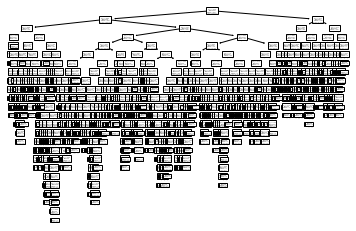

In [17]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize(10,7))
plot_tree(dt)
plt.show()

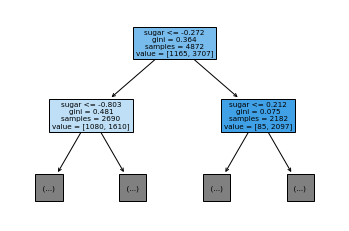

In [19]:
plt.figure()
plot_tree(dt,max_depth=1,filled=True,feature_names=['alcohol','sugar','pH'])
plt.show()

In [36]:
dt1=DecisionTreeClassifier(max_depth=3,random_state=42)
dt1.fit(t_x,t_y)
dt1.score(t_x,t_y),dt1.score(tt_x,tt_y)

(0.8499589490968801, 0.8363076923076923)

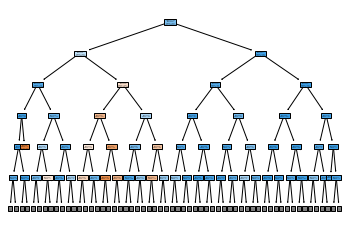

In [37]:
plt.figure()
plot_tree(dt,max_depth=5,filled=True,feature_names=['alcohol','sugar','pH'])#max_depth=1 깊이
plt.show()#불순도에 따른 기준으로 분류

In [35]:
dt1.feature_importances_

array([0.19205911, 0.61085626, 0.19708463])